## Problem Set 6
### ECON 833

#### Bhavna Phogaat

## Estimating Regression Trees

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint

In [3]:
# Reading the dataset

df = pd.read_csv('https://raw.githubusercontent.com/jdebacker/CompEcon_Fall21/main/MachineLearning/biden.csv')

df.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [ ]:
df.shape

In [4]:
# Dropping rows with null values
final = df.dropna()

final.shape

(1807, 6)

In [ ]:
# There was no missing value in any row/column hence we work with our 'df' dataset

In [5]:
# Splitting the dataset in predictor and response variable

pred_cols = ['female','age','educ','dem','rep']
X = df[pred_cols]    # predictors
y = df.biden       # response variable

In [6]:
# Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

## Question 1.
### Use recursive binary splitting to fit a decision tree to the training data

In [7]:
# Creating Decision Tree classifer object
clf = tree.DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

# Training Decision Tree Classifer
clf_tree = clf.fit(X_train,y_train)

# Predicting the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
# Printing text representation of the tree

rep = export_text(clf_tree, feature_names=pred_cols)
print(rep)

|--- dem <= 0.50
|   |--- rep <= 0.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [56.49]
|   |   |--- female >  0.50
|   |   |   |--- value: [61.27]
|   |--- rep >  0.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [38.33]
|   |   |--- female >  0.50
|   |   |   |--- value: [44.89]
|--- dem >  0.50
|   |--- age <= 54.50
|   |   |--- educ <= 15.50
|   |   |   |--- value: [71.11]
|   |   |--- educ >  15.50
|   |   |   |--- value: [76.59]
|   |--- age >  54.50
|   |   |--- female <= 0.50
|   |   |   |--- value: [75.19]
|   |   |--- female >  0.50
|   |   |   |--- value: [80.29]



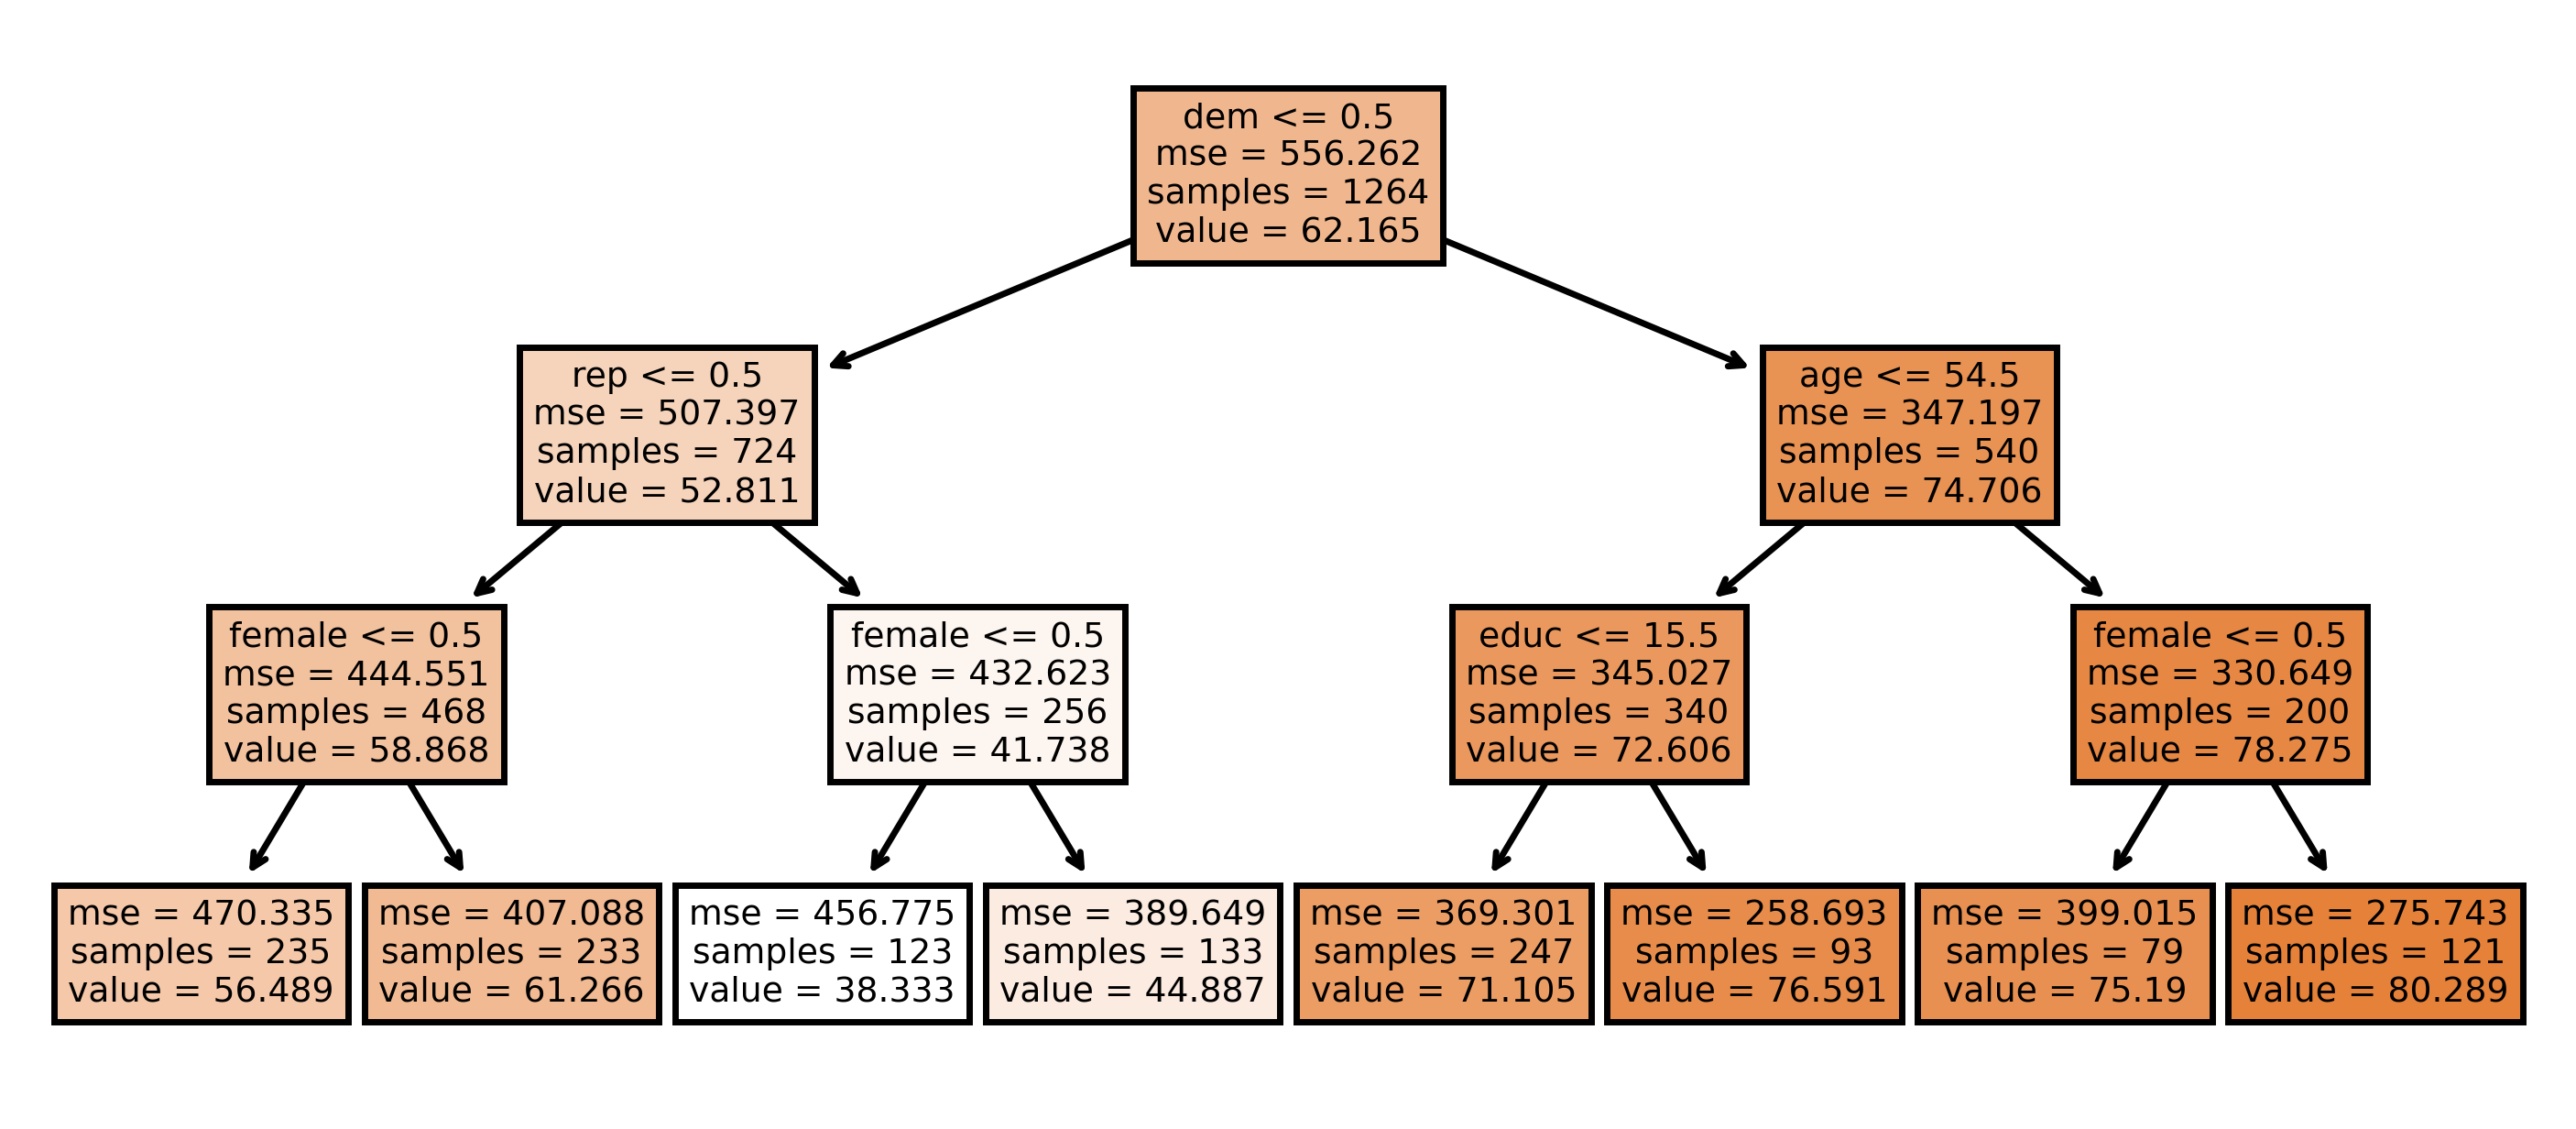

In [9]:
# Plotting the tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,3), dpi=500)
tree.plot_tree(clf_tree,
           feature_names = pred_cols, 
           filled = True);

fig.savefig('decisiontree.png')

In [10]:
# The test MSE

MSE = mean_squared_error(y, clf_tree.predict(X))
print('The MSE of a tree of depth ', clf_tree.get_depth(), ' and ',
      clf_tree.get_n_leaves(), ' leaves = ', round(MSE,2))

The MSE of a tree of depth  3  and  8  leaves =  392.19


### Decision trees help us take a subset of the data, and then decide the best manner to split the subset further. Our response value is feeling thermometer towards Joe Biden. In this dataset we first split by the condition whether the respondent is a democrat and the following interpretations can be made:
#### 1. For female democrats who are more than 54.5 years old, the thermometer value is 80.289
#### 2. For male democrats who are more than 54.5 years old, the thermometer value is 75.19
#### 3. For democrats who are less than 54.4 years old with more than 15.5 years of education, the thermometer value is 76.59
#### 4. For democrats who are less than 54.4 years old with less than 15.5 years of education, the thermometer value is 71.105
#### 5. For female republicans, the thermometer value is 44.887
#### 6. For male republicans, the thermometer value is 38.33
#### 7. For female respondents, the thermometer value is 61.266
#### 8. For male respondents, the thermometer value is 56.489

## Question 2.
### Use sklearn.model_selection.RandomizedSearchCV to optimally tune the hyperparameters in the decision tree

In [11]:
# Tuning the hyperparameters in the decision tree

param_dist = {"max_depth": [3 , 10],
              "min_samples_split": sp_randint (2 , 20 ),
              "min_samples_leaf": sp_randint (2 , 20 )}

In [12]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = param_dist, 
                               n_iter = 100, 
                               cv = 5, 
                               random_state=25, 
                               n_jobs = -1, 
                               scoring='neg_mean_squared_error')

In [13]:
# Fitting the random search model

rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 10],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001556640BF40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015564FBAD00>},
                   random_state=25, scoring='neg_mean_squared_error')

In [14]:
# checking the parameters that return the highest accuracy

best_parameters = rf_random.best_params_
print("Best parameters:", best_parameters)

Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 16}


In [15]:
# Finding the best accuracy achieved

best_result = rf_random.best_score_
print("MSE of optimal results: ", round(best_result,2))

MSE of optimal results:  -399.18


## Question 3.
###  Tune the parameters of a RandomForest regression model on these data sklearn.ensemble.RandomForestRegressor()

In [16]:
# Tuning the hyperparameters in the decision tree

param_dist = {"n_estimators": [10 , 200],
              "max_depth": [3 , 10],
              "min_samples_split": sp_randint (2 , 20 ) ,
              "min_samples_leaf": sp_randint (2 , 20 ) ,
              "max_features": sp_randint (1 , 5)}

In [17]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfe = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfe_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = param_dist, 
                               n_iter = 100, 
                               cv = 5, 
                               random_state=25, 
                               n_jobs = -1, 
                               scoring='neg_mean_squared_error')

In [18]:
# Fitting the random search model

rfe_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 10],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015563BD3370>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015564FBAA60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015563BD3C70>,
                                        'n_estimators': [10, 200]},
                   random_state=25, scoring='neg_mean_squared_error')

In [19]:
# checking the parameters that return the highest accuracy

best_parameters = rfe_random.best_params_
print("Best parameters: ",best_parameters)

Best parameters:  {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 2, 'n_estimators': 200}


In [20]:
# Finding the best accuracy achieved

best_result = rfe_random.best_score_
print("MSE of optimal results: ", round(best_result,2))

MSE of optimal results:  -397.73
